# MTH 337: Week 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The "butterfly effect"

For some values of b, the population x always converges to the same value, regardless of the initial population. This is illustrated below.

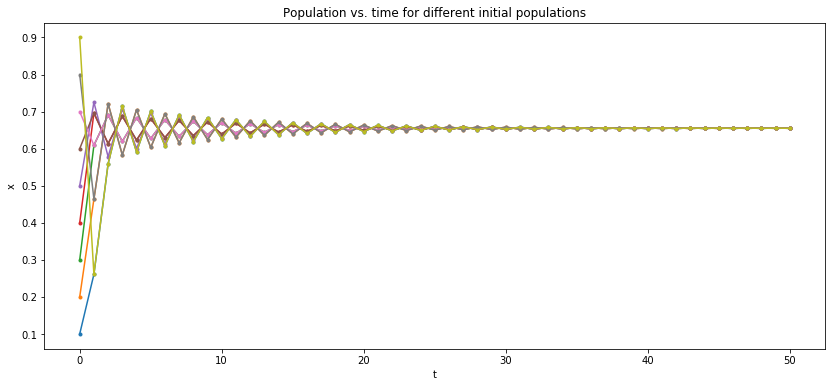

In [2]:
plt.figure(figsize=(14, 6))
b = 2.9
for x in np.linspace(.1, .9, 9):
    pops = [x]
    for t in range(50):
        x = b*x*(1-x)
        pops.append(x)
    plt.plot(pops, '.-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Population vs. time for different initial populations');

## np.mean

This finds the mean value of the elements of an array.

In [3]:
x = np.arange(11)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [4]:
np.mean(x)

5.0

## np.linalg.solve(A, b)

This solves a matrix equation of the form A**w** = **b**, and returns the value of **w**.

In [5]:
? np.linalg.solve

## NumPy Multidimensional Arrays

NumPy arrays can be multidimensional:

- Each dimension is called an *axis*.
- The number of elements in an axis is called the *size* of the axis.
- The tuple of axis sizes is called the *shape* of the array.

Two dimensional arrays can be created from a list of lists using **np.array**.

In [6]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)

[[1 2 3]
 [4 5 6]]


### Array properties

The shape can be accessed as a property of the array 

In [7]:
a.shape

(2, 3)

The *dtype* of an aray is the data type of the individual elements

In [8]:
a.dtype

dtype('int64')

### Creating multidimensional arrays

The array creation functions np.zeros, np.ones, np.empty etc can all be passed a shape as an argument. This specifies the shape of the array to create. By default, arrays are created as arrays of floats.

In [9]:
b = np.ones((3, 4))
print(b)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


Change the data type of the elements using the *dtype* keyword argument.

In [10]:
b = np.ones((3, 4), dtype=int) # Create an array of integers
print(b)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [11]:
b = np.ones((3, 4), dtype=bool) # Create an array of booleans
print(b)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


### Type conversion

Each data type has one value that equates to False. All others equate to True. The False values are:

- integer: 0
- float: 0.0
- list: []
- string: ''

In [12]:
np.array([0, 1, 2], dtype=bool)

array([False,  True,  True], dtype=bool)

List indexing and slicing

In [13]:
a = np.arange(20).reshape((4, 5))
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


Access individual elements of an array using an integer index for each axis, separated by commas.

In [14]:
print(a[1,2])

7


Modify elements using the '=' assignment operator.

In [15]:
a[1,2] = 100
print(a)

[[  0   1   2   3   4]
 [  5   6 100   8   9]
 [ 10  11  12  13  14]
 [ 15  16  17  18  19]]


In [16]:
a[1,2] = 7
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


Slice out a row in a 2-dimensional array using a single integer.

In [17]:
print(a[0])

[0 1 2 3 4]


Slice out a column using a colon ':' for the first axis (meaning 'select all rows'), then an integer for the column index.

In [18]:
print(a[:,0])

[ 0  5 10 15]


Specify a slice for each axis to slice out the central section.

In [19]:
print(a[1:-1,1:-1])

[[ 6  7  8]
 [11 12 13]]


Array operations are performed element-by-element for multidimensional arrays.

In [20]:
a + 1 # Add 1 to each element

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [21]:
a *= 3 # Multiply each element by 3, and store the result back to the same array

In [22]:
a

array([[ 0,  3,  6,  9, 12],
       [15, 18, 21, 24, 27],
       [30, 33, 36, 39, 42],
       [45, 48, 51, 54, 57]])

Using +=, &ast;=, -=, /= modifies the original array.

In [23]:
a +=1
print(a)

[[ 1  4  7 10 13]
 [16 19 22 25 28]
 [31 34 37 40 43]
 [46 49 52 55 58]]


Performing an operation on an array does not modify the array.

In [24]:
a + 10

array([[11, 14, 17, 20, 23],
       [26, 29, 32, 35, 38],
       [41, 44, 47, 50, 53],
       [56, 59, 62, 65, 68]])

In [25]:
a

array([[ 1,  4,  7, 10, 13],
       [16, 19, 22, 25, 28],
       [31, 34, 37, 40, 43],
       [46, 49, 52, 55, 58]])

## subplot

A figure can be divided into a grid of cells using the **subplot** function:

- The syntax is subplot(rows, columns, index).
- A grid is created of rows and columns.
- The index specifies the grid cell to plot into, starting at 1 then increasing left-to-right and top-to-bottom.
- Calling subplot causes any following plotting commands to be performed in the selected cell. 

#### Lissajous figures

These are a family of parametrized curves of the form:
    
- x = A cos(at + &delta;)
- y = B sin(bt)

**subplot** can be used to explore the types of figures generated for different values of *a* and *b*. We create a grid of cells where the value of *a* changes with each row, and the value of *b* changes with each column.

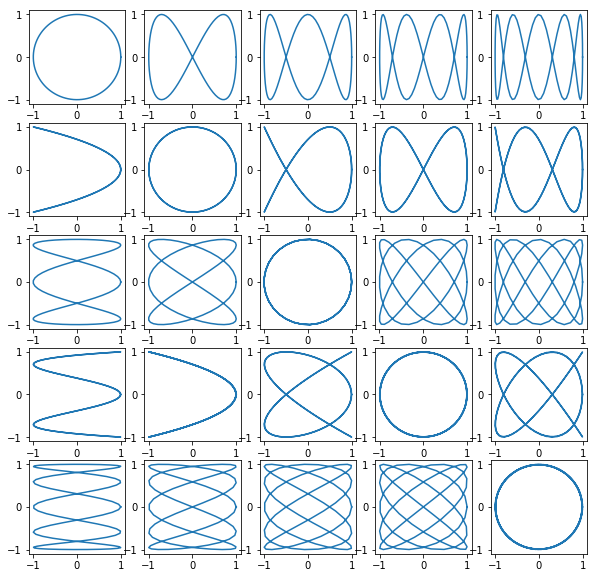

In [26]:
rows, cols = 5, 5
t = np.linspace(0, 2*np.pi, 100)
i = 1
plt.figure(figsize=(10,10))
for a in range(1, rows+1):
    for b in range(1, cols+1):
        plt.subplot(rows, cols, i)
        plt.plot(np.cos(a*t), np.sin(b*t))
        i += 1

### xticks, yticks

The Matplotlib functions **xticks** and **yticks** can be used to set the locations of the tick points on the x and y axes. Calling these functions with an empty list will turn off the ticks.

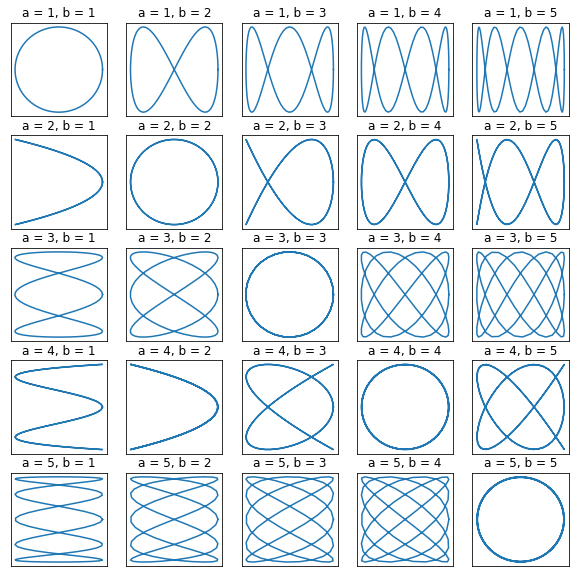

In [27]:
rows, cols = 5, 5
t = np.linspace(0, 2*np.pi, 100)
i = 1
plt.figure(figsize=(10,10))
for a in range(1, rows+1):
    for b in range(1, cols+1):
        plt.subplot(rows, cols, i)
        plt.plot(np.cos(a*t), np.sin(b*t))
        plt.xticks([])
        plt.yticks([])
        plt.title('a = {}, b = {}'.format(a, b))
        i += 1